In [1]:
import pandas as pd


In [2]:
crop = pd.read_csv("CropData.csv")
crop.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [3]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [4]:
crop.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [5]:
%matplotlib inline

In [6]:
import matplotlib as plt

array([[<AxesSubplot: title={'center': 'Cost of Cultivation (`/Hectare) A2+FL'}>,
        <AxesSubplot: title={'center': 'Cost of Cultivation (`/Hectare) C2'}>],
       [<AxesSubplot: title={'center': 'Cost of Production (`/Quintal) C2'}>,
        <AxesSubplot: title={'center': 'Yield (Quintal/ Hectare)'}>]],
      dtype=object)

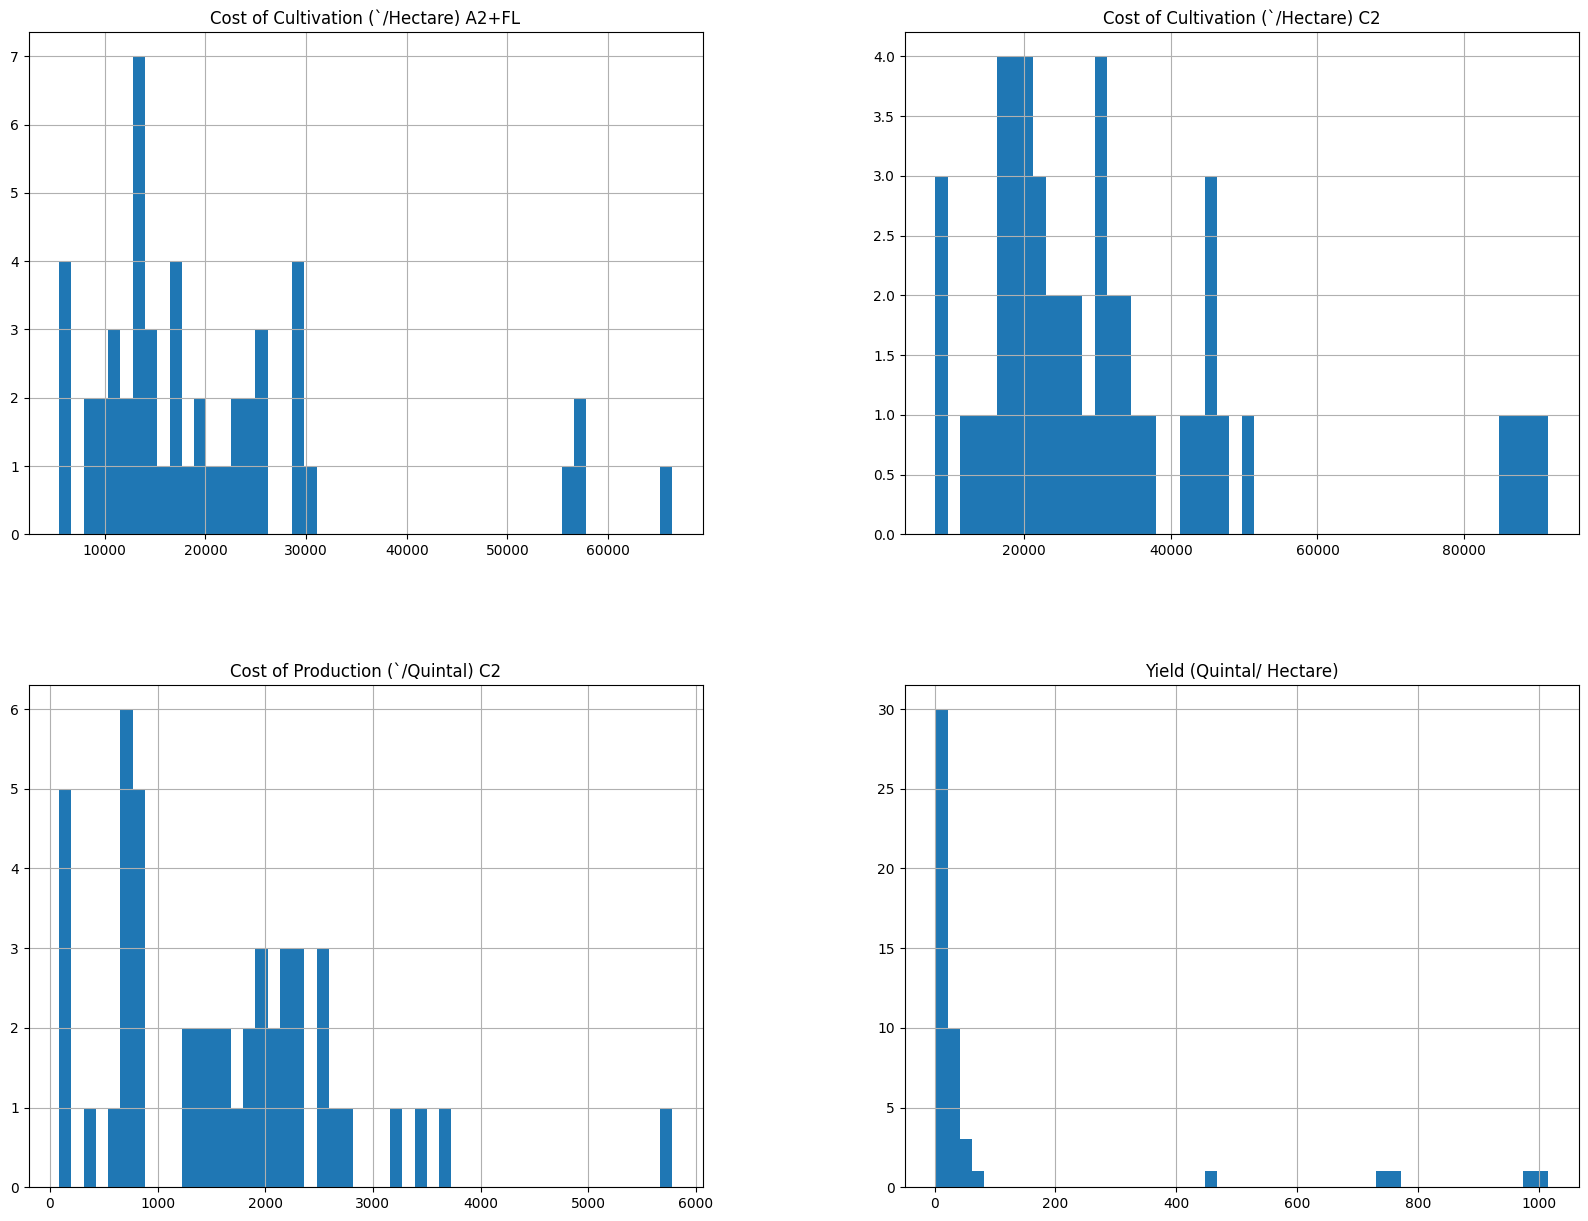

In [7]:
crop.hist(bins=50 ,figsize=(20,15))

# Test spliting


In [8]:
import numpy as np

In [9]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(crop , test_size = 0.2 , random_state = 42)
print(f"Rows in test set:{len(test_set)}\nRows in train set: {len(train_set)}\n")

Rows in test set:10
Rows in train set: 39



In [10]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1 ,test_size = 0.2, random_state = 4)
for train_index ,test_index in split.split(crop, crop['Cost of Cultivation (`/Hectare) C2']):
    strat_train_set = crop.loc[train_index]
    strat_test_set = crop.loc[test_index]

# Looking for correlations

In [11]:
corr_matrix = crop.corr()

In [12]:
corr_matrix['Cost of Cultivation (`/Hectare) C2'].sort_values(ascending=False)# strong positive correlation

Cost of Cultivation (`/Hectare) C2       1.000000
Cost of Cultivation (`/Hectare) A2+FL    0.981225
Yield (Quintal/ Hectare)                 0.866424
Cost of Production (`/Quintal) C2       -0.497092
Name: Cost of Cultivation (`/Hectare) C2, dtype: float64

array([[<AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) A2+FL', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>,
        <AxesSubplot: xlabel='Yield (Quintal/ Hectare)', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>,
        <AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) C2', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>,
        <AxesSubplot: xlabel='Cost of Production (`/Quintal) C2', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>],
       [<AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) A2+FL', ylabel='Yield (Quintal/ Hectare)'>,
        <AxesSubplot: xlabel='Yield (Quintal/ Hectare)', ylabel='Yield (Quintal/ Hectare)'>,
        <AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) C2', ylabel='Yield (Quintal/ Hectare)'>,
        <AxesSubplot: xlabel='Cost of Production (`/Quintal) C2', ylabel='Yield (Quintal/ Hectare)'>],
       [<AxesSubplot: xlabel='Cost of Cultivation (`/Hectare) A2+FL', ylabel='Cost of Cultivation (`/Hectare) C2'>,
        <AxesSubplot: 

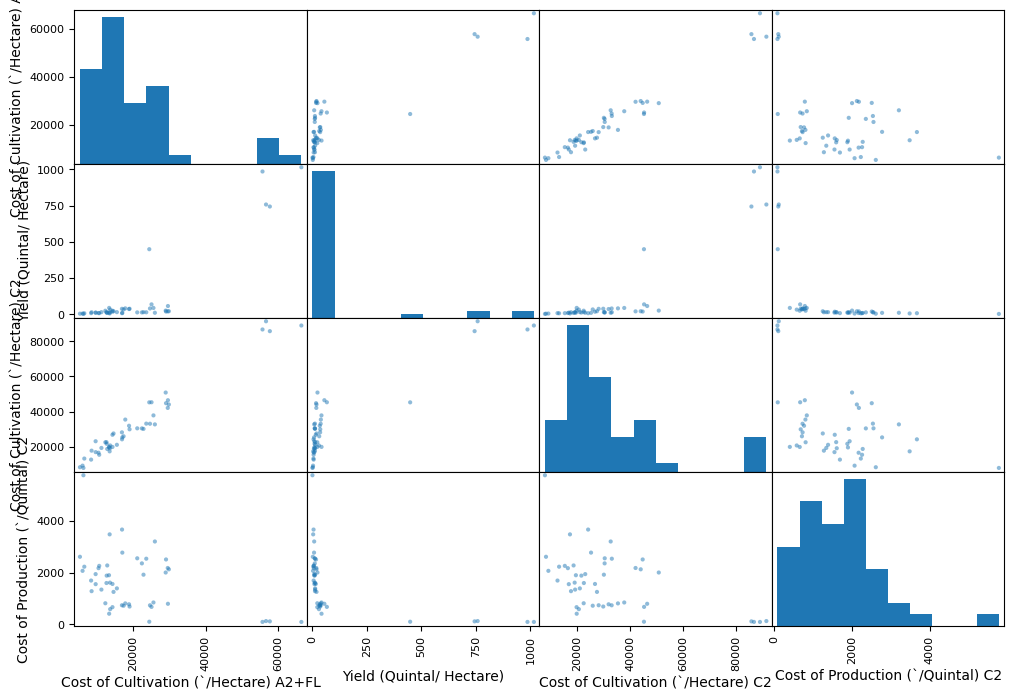

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["Cost of Cultivation (`/Hectare) A2+FL" ,"Yield (Quintal/ Hectare)","Cost of Cultivation (`/Hectare) C2","Cost of Production (`/Quintal) C2"]
scatter_matrix(crop[attributes], figsize = (12,8))

C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Cost of Production (`/Quintal) C2', ylabel='Cost of Cultivation (`/Hectare) A2+FL'>

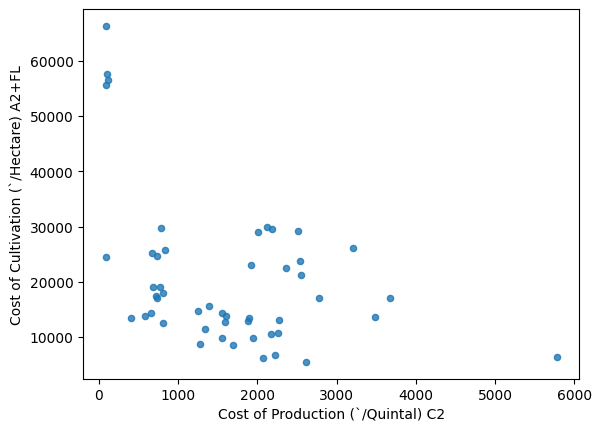

In [14]:
crop.plot(kind = "scatter" , x = "Cost of Production (`/Quintal) C2", y= "Cost of Cultivation (`/Hectare) A2+FL" ,alpha = 0.8)

In [15]:
crop = strat_train_set.drop('Cost of Production (`/Quintal) C2' , axis =1)
crop_labels = strat_train_set['Cost of Production (`/Quintal) C2'].copy()

# Trying out Attribute combinations

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(crop.loc[:, ~crop.columns.isin(['Crop', 'State'])])


SimpleImputer(strategy='median')

In [17]:
imputer.statistics_

array([1.563543e+04, 2.676209e+04, 1.370000e+01])

In [18]:
x = imputer.transform(crop.loc[:, ~crop.columns.isin(['Crop', 'State'])])

In [19]:
crop_tr = pd.DataFrame(x , columns = crop.loc[:, ~crop.columns.isin(['Crop', 'State'])].columns)

In [20]:
crop_tr.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Yield (Quintal/ Hectare)
count,39.000000,39.000000,39.000000
mean,21089.777692,32277.904872,118.631538
std,14667.698032,21647.656938,271.759740
min,6204.230000,7868.640000,1.320000
25%,12880.180000,19171.695000,9.460000
50%,15635.430000,26762.090000,13.700000
75%,24942.905000,36612.665000,39.435000
max,66335.060000,91442.630000,1015.450000


# Creating a pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' ,SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [22]:
crop_num_tr = my_pipeline.fit_transform(crop.loc[:, ~crop.columns.isin(['Crop', 'State'])])

In [23]:
crop_num_tr

array([[-0.46056913, -0.58346255, -0.35440995],
       [-0.99496963, -0.89237639, -0.42024332],
       [ 0.28076058,  0.6090013 , -0.19094487],
       [-0.51405283, -0.70027519, -0.42467943],
       [ 0.00961653, -0.08626297, -0.39761543],
       [-1.01179052, -1.14231087, -0.43731676],
       [-0.57432802, -0.4547669 , -0.39165091],
       [-0.52325134, -0.58124385, -0.28212745],
       [ 0.31752838,  0.25851096, -0.28313396],
       [-0.13611267, -0.1123881 , -0.30359971],
       [-0.55971732, -0.6363895 , -0.4122285 ],
       [-0.86591489, -0.92038374, -0.41677645],
       [ 0.34457344,  0.01897927, -0.40745689],
       [-0.71202596, -0.79119249, -0.41726106],
       [ 2.38739031,  2.54993671,  3.23417971],
       [ 3.12501314,  2.65567735,  3.34318128],
       [-1.02811895, -1.08161588, -0.4271398 ],
       [ 0.25149705,  0.03595112, -0.29670324],
       [ 0.09794448, -0.08817936, -0.39757815],
       [ 2.52678112,  2.50483162,  2.33130077],
       [ 0.59226467,  0.6632386 , -0.233

# Selecting a desired model

In [24]:
crop_num_tr.shape


(39, 3)

#### LinearRegression Model

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(crop_num_tr ,crop_labels)

LinearRegression()

In [26]:
some_data = crop.loc[:, ~crop.columns.isin(['Crop', 'State'])].iloc[:5]

In [27]:
some_labels = crop_labels.iloc[:5]

In [28]:
prepared_data = my_pipeline.transform(some_data)

In [29]:
model.predict(prepared_data)

array([2143.01855549, 1861.910508  ,  713.84931598, 2328.53558855,
       1873.66518443])

In [30]:
list(some_labels)


[658.77, 2228.97, 669.86, 3484.01, 2554.91]

In [31]:
from sklearn.metrics import mean_squared_error
crop_prediction =model.predict(crop_num_tr)
lin_mse = mean_squared_error(crop_labels ,crop_prediction)
lin_rmse = np.sqrt(lin_mse)

In [32]:
lin_mse

826625.4435781209

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,crop_num_tr ,crop_labels,scoring="neg_mean_squared_error" ,cv=10)
ramse_scores = np.sqrt(-scores)


In [34]:
ramse_scores

array([ 960.32074333, 2004.51350009,  729.2500997 ,  699.39177368,
        713.75560801,  572.31067218, 1164.55912961,  605.24782166,
        732.20395248,  409.00684244])

#### Decisiontree model

In [35]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(crop_num_tr ,crop_labels)

DecisionTreeRegressor()

In [36]:
some_data = crop.loc[:, ~crop.columns.isin(['Crop', 'State'])].iloc[:5]

In [37]:
some_labels = crop_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([ 658.77, 2228.97,  669.86, 3484.01, 2554.91])

In [40]:
list(some_labels)


[658.77, 2228.97, 669.86, 3484.01, 2554.91]

In [41]:
from sklearn.metrics import mean_squared_error
crop_prediction =model.predict(crop_num_tr)
lin_mse = mean_squared_error(crop_labels ,crop_prediction)
lin_rmse = np.sqrt(lin_mse)

In [42]:
lin_mse

0.0

### Evaluating the model

#### Cross validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,crop_num_tr ,crop_labels,scoring="neg_mean_squared_error" ,cv=10)
rmse_scores = np.sqrt(-scores)


In [44]:
rmse_scores

array([ 890.00932078, 1859.14540162,  660.98775234,  337.46151329,
       1856.80624102,  851.74312156,  465.1032387 ,  406.18070612,
        707.91941648,   66.65891888])

In [45]:
def print_scores(scores):
    print("scores:" , scores)
    print("Mean:", scores.mean())
    print("standard Deviation:" , scores.std())

In [46]:
print_scores(rmse_scores)

scores: [ 890.00932078 1859.14540162  660.98775234  337.46151329 1856.80624102
  851.74312156  465.1032387   406.18070612  707.91941648   66.65891888]
Mean: 810.2015630792382
standard Deviation: 574.0340086751185


In [47]:
print_scores(ramse_scores)

scores: [ 960.32074333 2004.51350009  729.2500997   699.39177368  713.75560801
  572.31067218 1164.55912961  605.24782166  732.20395248  409.00684244]
Mean: 859.0560143184551
standard Deviation: 429.46375823768847


# Random forest regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(crop_num_tr ,crop_labels)


RandomForestRegressor()

In [49]:
some_data = crop.loc[:, ~crop.columns.isin(['Crop', 'State'])].iloc[:5]

In [50]:
some_labels = crop_labels.iloc[:5]

In [51]:
prepared_data = my_pipeline.transform(some_data)

In [52]:
model.predict(prepared_data)

array([1002.3449, 2272.6596,  664.0493, 3006.5429, 2507.4983])

In [53]:
list(some_labels)


[658.77, 2228.97, 669.86, 3484.01, 2554.91]

In [54]:
from sklearn.metrics import mean_squared_error
crop_prediction =model.predict(crop_num_tr)
lin_mse = mean_squared_error(crop_labels ,crop_prediction)
lin_rmse = np.sqrt(lin_mse)

In [55]:
lin_mse

117670.66840347354

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,crop_num_tr ,crop_labels,scoring="neg_mean_squared_error" ,cv=10)
ranmse_scores = np.sqrt(-scores)

In [59]:
ranmse_scores

array([ 631.17158389, 1770.58336752,  282.79401725,  387.25929633,
        985.83575513,  256.87868259,  650.22856527,  345.33754915,
        584.32582165,  146.25615463])

In [60]:
def print_scores(scores):
    print("scores:" , scores)
    print("Mean:", scores.mean())
    print("standard Deviation:" , scores.std())

In [61]:
print_scores(ranmse_scores)

scores: [ 631.17158389 1770.58336752  282.79401725  387.25929633  985.83575513
  256.87868259  650.22856527  345.33754915  584.32582165  146.25615463]
Mean: 604.0670793416288
standard Deviation: 453.54783840450165
